# The Sower


# Forecast

As a final step, we will run a forecast.

Unfortunately, our quick exploration gave us few signifiers,

- Only 2 entities (books) 
- Only `soldunits` and `subscriptionunits` are significant

## Next steps

In order to give a better


    - Get more data
    - Communicate with stakeholders (business, booksellers). Having an open conversation can help us get more insights with our modeling. 
    - Get more detailed signifiers and visualizations for the different channels (Amazon, Apple and BN)

For now, what we can do instead is run a preliminary ARIMA model to forest. Facebook's Prophet has straighforward interface and we are going to use it,

In [1]:
import pandas as pd

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot

Importing plotly failed. Interactive plots will not work.


## Data

In [2]:
df = pd.read_csv("../data/interim/sower.csv")

## The Walking Dead

Let's forecast the sales of "The Walking Dead" 1 year ahead using a ARIMA model. ARIMA is a autoregressive model, so we are assuming the variable depends linearly on its own previous values 

In [3]:
# working df
wdf = df[(df["entity"] == "The Walking Dead") & (df["formattype"] == "print")]
wdf = wdf[["todate", "soldunits"]] 
wdf = wdf.rename({"todate": "ds", "soldunits": "y"}, axis=1)

In [4]:
#Prophet will by default fit weekly and yearly seasonalities
m = Prophet()
#m.add_seasonality(name='monthly', period=2, fourier_order=10)
m.fit(wdf)

future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


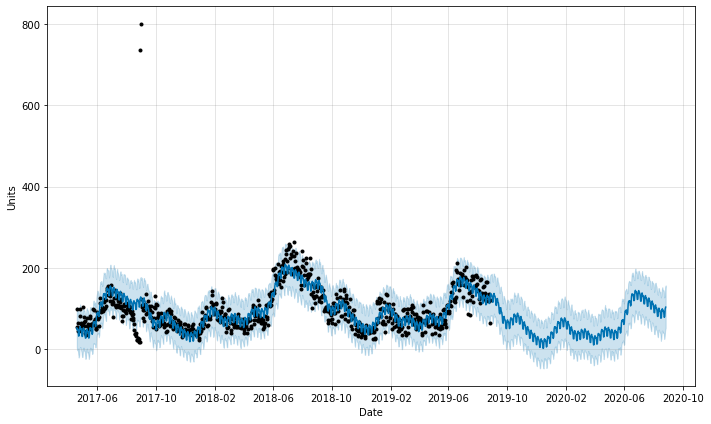

In [5]:
fig = m.plot(forecast, xlabel="Date", ylabel="Units")
#a = add_changepoints_to_plot(fig.gca(), m, forecast)

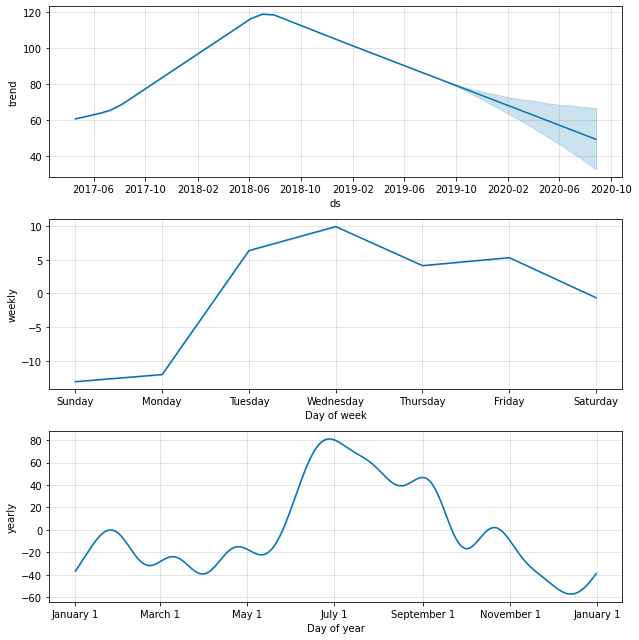

In [6]:
fig = m.plot_components(forecast)

## Forecast with growth

For a final exploration, we can try to experiment with parameters of our ARIMA model. For instance, we can 
apply logistic growth subjected to cap. 

By default, Prophet uses a linear model for its forecast. We will try a logistic model with a cap, represeting some maximum achievable poin or, as we call it, a carrying capacity.

Simulating growth based on ARIMA could help our advertising team estimate ROI.

Let's assume cap of 250 units. We could get that information from survey or experts,

In [7]:
CAP = 250
FLOOR = 50

wdf["cap"] = CAP
#wdf["floor"] = FLOOR

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


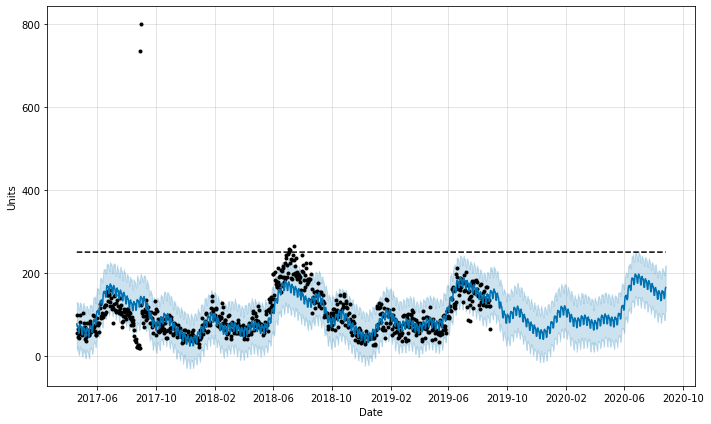

In [8]:
#Prophet will by default fit weekly and yearly seasonalities
m = Prophet(growth="logistic")
m.fit(wdf)

future = m.make_future_dataframe(periods=365)
future["cap"] = CAP
#future["floor"] = FLOOR

forecast = m.predict(future)

fig = m.plot(forecast, xlabel="Date", ylabel="Units")